In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cybersecurity-intrusion-detection-dataset/cybersecurity_intrusion_data.csv


# Cybersecurity Intrusion Detection: A Machine Learning Approach

## Data Exploration & Preprocessing
We begin by loading the cybersecurity intrusion dataset and performing initial exploration:
* Checked for missing values.
* Examined data types and summary statistics.
* Reset the index for easier manipulation.


In [2]:
df1 = pd.read_csv("/kaggle/input/cybersecurity-intrusion-detection-dataset/cybersecurity_intrusion_data.csv", index_col=0)

display(df1.head())
display(df1.info())
display(df1.isnull().sum())
display(df1.shape)
display(df1.describe().T)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
session_id,,,,,,,,,,
SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 9537 entries, SID_00001 to SID_09537
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   network_packet_size  9537 non-null   int64  
 1   protocol_type        9537 non-null   object 
 2   login_attempts       9537 non-null   int64  
 3   session_duration     9537 non-null   float64
 4   encryption_used      7571 non-null   object 
 5   ip_reputation_score  9537 non-null   float64
 6   failed_logins        9537 non-null   int64  
 7   browser_type         9537 non-null   object 
 8   unusual_time_access  9537 non-null   int64  
 9   attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 819.6+ KB


None

network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

(9537, 10)

,count,mean,std,min,25%,50%,75%,max
network_packet_size,9537.0,500.430639,198.379364,64.000000,365.000000,499.000000,635.000000,1285.000000
login_attempts,9537.0,4.032086,1.963012,1.000000,3.000000,4.000000,5.000000,13.000000
session_duration,9537.0,792.745312,786.560144,0.500000,231.953006,556.277457,1105.380602,7190.392213
ip_reputation_score,9537.0,0.331338,0.177175,0.002497,0.191946,0.314778,0.453388,0.924299
failed_logins,9537.0,1.517773,1.033988,0.000000,1.000000,1.000000,2.000000,5.000000
unusual_time_access,9537.0,0.149942,0.357034,0.000000,0.000000,0.000000,0.000000,1.000000
attack_detected,9537.0,0.447101,0.497220,0.000000,0.000000,0.000000,1.000000,1.000000


In [3]:
# Reset index and make the old index a column
df = df1.reset_index()

# Display the updated DataFrame
display(df.head())


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


Next, we visualized **attack_detected** distribution using a bar chart, showing a fairly balanced dataset:
* 5273 (No Attack) vs. 4264 (Attack)

To understand feature relationships, we generated a **correlation heatmap**, identifying key numerical correlations.

In [4]:
attack_counts = df.attack_detected.value_counts()
attack_counts

attack_detected
0    5273
1    4264
Name: count, dtype: int64

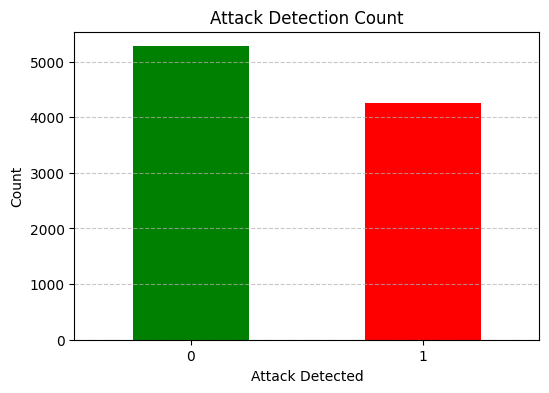

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
attack_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel("Attack Detected")
plt.ylabel("Count")
plt.title("Attack Detection Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()

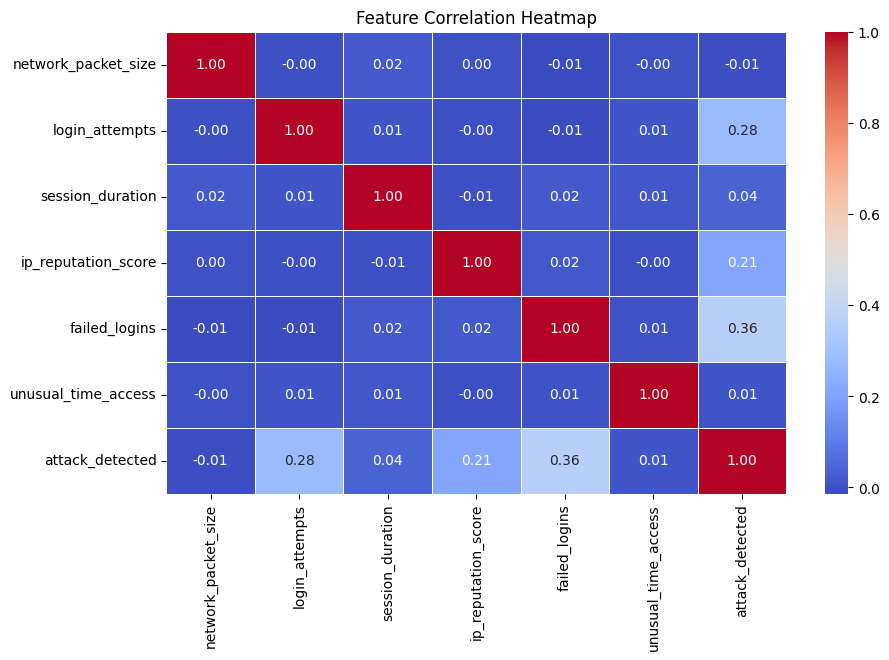

In [6]:
import seaborn as sns

df_numeric = df.select_dtypes(include=np.number) 

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()


## Pipeline

In this workflow, we aim to predict the likelihood of an attack using features selected based on a previous heatmap analysis. These features include numerical indicators like **login attempts, IP reputation score, and failed logins**, alongside categorical attributes such as **protocol type, encryption used, and browser type**.  

To ensure a structured approach, we first split the dataset into **80% training and 20% testing**. Then, we define a **preprocessing pipeline**:  
- **Numerical features** are standardized using `StandardScaler` to normalize their scales.  
- **Categorical features** are encoded with `OneHotEncoder` to handle non-numeric values.  

This transformation is applied using a `ColumnTransformer`, ensuring that both feature types are processed correctly before training. The transformed data is then passed into an `XGBRegressor`, a powerful gradient boosting model optimized for tabular data.  

The entire process—from preprocessing to model training—is wrapped in a `Pipeline`, allowing seamless execution and minimizing the risk of data leakage. Once trained, the model makes predictions on the test set, confirming that the pipeline is successfully implemented and ready for evaluation. 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor

# Features and targe
features = ['login_attempts', 'ip_reputation_score', 'failed_logins', 'protocol_type', 'encryption_used', 'browser_type']
y = df['attack_detected']
X = df[features]

# Define feature types
numerical_features = ['login_attempts', 'ip_reputation_score', 'failed_logins']
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Full pipeline with XGBRegressor
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Show pipeline summary
print("Pipeline successfully trained!")


Pipeline successfully trained!


## Training
After training our initial `XGBRegressor` model, we evaluated its performance using **Mean Absolute Error (MAE)**. The model achieved an MAE of **0.1845**, significantly outperforming the baseline model (**0.4950**), which simply predicted the mean of `y_train`.  

To further optimize the model, we performed **GridSearchCV**, systematically testing different hyperparameter combinations. The best parameters—**500 estimators, 0.01 learning rate, and max depth of 7**—slightly improved the MAE to **0.1836**.  

For a more efficient search, we then used **RandomizedSearchCV**, exploring a wider range of hyperparameters with 20 iterations. The best model, with **400 estimators, 0.01625 learning rate, and max depth of 7**, resulted in an MAE of **0.1852**, close to the GridSearch result.  

These optimizations show that while hyperparameter tuning helps refine model performance, the initial pipeline already provided strong results. 

In [8]:
from sklearn.metrics import mean_absolute_error

# Predictions from our pipeline
y_pred = pipeline.predict(X_test)

# Baseline model: predict the mean of y_train
baseline_pred = np.full(shape=y_test.shape, fill_value=y_train.mean())

# Compute MAE
mae_pipeline = mean_absolute_error(y_test, y_pred)
mae_baseline = mean_absolute_error(y_test, baseline_pred)

print(f"MAE (XGBRegressor Model): {mae_pipeline:.4f}")
print(f"MAE (Baseline - Mean Prediction): {mae_baseline:.4f}")


MAE (XGBRegressor Model): 0.1845
MAE (Baseline - Mean Prediction): 0.4950


In [9]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7]
}

# GridSearchCV setup
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Run GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model MAE
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)

print(f"Best Model MAE: {mae_best:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__n_estimators': 500}
Best Model MAE: 0.1836


In [10]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distributions
param_dist = {
    'model__n_estimators': np.arange(100, 600, 100),
    'model__learning_rate': np.linspace(0.005, 0.05, 5),
    'model__max_depth': np.arange(3, 10, 2),
    'model__subsample': np.linspace(0.6, 1.0, 5),
    'model__colsample_bytree': np.linspace(0.6, 1.0, 5)
}

# RandomizedSearchCV setup (n_iter=20 to keep it efficient)
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=20, 
    cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42, verbose=2
)

# Run RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters & MAE
print("Best Parameters:", random_search.best_params_)

# Best model evaluation
best_model_random = random_search.best_estimator_
y_pred_best_random = best_model_random.predict(X_test)
mae_best_random = mean_absolute_error(y_test, y_pred_best_random)

print(f"Best Model MAE (RandomizedSearch): {mae_best_random:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'model__subsample': 1.0, 'model__n_estimators': 400, 'model__max_depth': 7, 'model__learning_rate': 0.01625, 'model__colsample_bytree': 1.0}
Best Model MAE (RandomizedSearch): 0.1852


## SHAP

After selecting the best model through **hyperparameter tuning**, we move on to understanding its decision-making process. While the heatmap we previously used helped us identify feature correlations, it did not reveal how individual features influence model predictions. To address this, we leverage SHAP (SHapley Additive exPlanations), a powerful tool for interpreting complex models like XGBoost.  

First, we extract the trained `XGBRegressor` from the pipeline and apply the same preprocessing transformations to our test data. Then, we use SHAP to compute feature contributions for each prediction. The summary plot visualizes the impact of each feature, allowing us to interpret which factors drive our model’s decisions. This step enhances our model transparency, ensuring our insights align with real-world expectations.

In [11]:
!pip install shap

 98%|===================| 1862/1908 [00:21<00:00]       

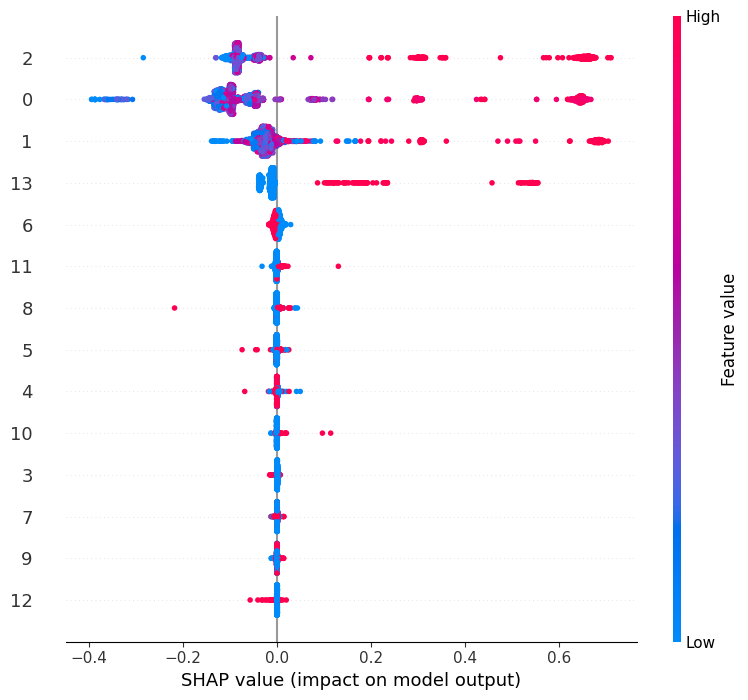

In [12]:
import shap
import matplotlib.pyplot as plt

# Extract the trained XGBoost model from the pipeline
xgb_model = best_model.named_steps["model"]

# Extract preprocessing step from pipeline
preprocessor = best_model.named_steps["preprocessing"]

# Transform X_test using the fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Convert to DataFrame for SHAP (optional, helps readability)
import pandas as pd
X_test_transformed = pd.DataFrame(X_test_transformed)

# Initialize SHAP explainer with XGB model
explainer = shap.Explainer(xgb_model, X_test_transformed)

# Compute SHAP values
shap_values = explainer(X_test_transformed)

# Summary plot
shap.summary_plot(shap_values, X_test_transformed)


## Refining our Model

To further refine our model and improve interpretability, we first extract the actual feature names used in training. Since categorical variables are transformed through one-hot encoding, we retrieve their encoded versions to understand their impact. By identifying the most important features, we gain insights into which factors contribute most to the model’s predictions.  

Next, we simplify our feature selection based on SHAP insights, keeping only the most influential variables. We preprocess the categorical ‘browser_type’ feature using one-hot encoding while ensuring no redundancy by dropping the first category. After merging numerical and transformed categorical features, we retrain the XGBRegressor with optimized hyperparameters. The updated model achieves a slightly **improved MAE**, confirming that focusing on key features enhances performance while maintaining accuracy.

In [13]:
# Extract numerical & categorical feature names
num_features = ['login_attempts', 'ip_reputation_score', 'failed_logins']
cat_features = ['protocol_type', 'encryption_used', 'browser_type']

# Get one-hot encoded feature names
cat_feature_names = best_model.named_steps["preprocessing"].named_transformers_["cat"].get_feature_names_out(cat_features)

# Combine all transformed feature names
all_feature_names = list(num_features) + list(cat_feature_names)

# Print the actual feature names corresponding to indices 13, 1, 0, 2
important_features = [all_feature_names[i] for i in [13, 1, 0, 2]]
print("Most important features:", important_features)


Most important features: ['browser_type_Unknown', 'ip_reputation_score', 'login_attempts', 'failed_logins']


In [14]:
# Select the raw features (before encoding)
features = ['ip_reputation_score', 'login_attempts', 'failed_logins', 'browser_type']
X = df[features]
y = df.attack_detected

# One-Hot Encode 'browser_type'
encoder = OneHotEncoder(handle_unknown="ignore", drop="first")  # Drop first to avoid redundancy
X_cat = encoder.fit_transform(X[['browser_type']]).toarray()
cat_feature_names = encoder.get_feature_names_out(['browser_type'])

# Convert to DataFrame
X_cat_df = pd.DataFrame(X_cat, columns=cat_feature_names, index=X.index)

# Combine numerical & encoded categorical features
X_num = X.drop(columns=['browser_type'])
X_final = pd.concat([X_num, X_cat_df], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train the updated model
model = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=7, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Updated Model MAE:", mae)
print("Final Features Used:", list(X_final.columns))


Updated Model MAE: 0.18336775989454254
Final Features Used: ['ip_reputation_score', 'login_attempts', 'failed_logins', 'browser_type_Edge', 'browser_type_Firefox', 'browser_type_Safari', 'browser_type_Unknown']


# Takeaways

Here are the key takeaways from our workflow:  

### **1. Feature Selection & Preprocessing Matter**  
- Initial feature selection was guided by a heatmap, identifying key predictors of attack detection.  
- Categorical variables were transformed using **one-hot encoding**, ensuring they could be effectively used in the model.  
- **StandardScaler** was applied to numerical features for consistency in scaling.  

### **2. Model Performance & Baseline Comparison**  
- The **XGBRegressor** significantly outperformed the baseline model, reducing the **MAE from 0.4950 to 0.1845**.  
- Hyperparameter tuning via **GridSearchCV** and **RandomizedSearchCV** helped fine-tune the model, further improving performance.  

### **3. Feature Importance & Explainability**  
- **SHAP analysis** provided deeper interpretability, showing how individual features influence predictions.  
- Unlike the correlation heatmap, SHAP values **capture non-linear interactions** and reveal individual feature contributions to model decisions.  

### **4. Refinement & Model Optimization**  
- Using SHAP insights, we **simplified feature selection** by keeping only the most impactful variables.  
- The updated model, trained on refined features, **achieved an MAE of 0.1834**, showing that reducing unnecessary features **did not harm performance**.  

### **5. Next Steps**  
- Further **feature engineering** could enhance model performance.  
- Exploring **alternative models** (e.g., LightGBM, CatBoost) may yield better results.  
- **Real-world validation** on unseen data is necessary before deployment.  

This workflow ensures an efficient, explainable, and high-performing model for attack detection. 